In [23]:
# Step 1: Load and Clean Weather Data for Time Series Modeling

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
# 1. Load the dataset
df = pd.read_csv("../../data/weather.csv") 

In [25]:
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,1/1/2010,2,30.0,22.7,26.1,34.4,25.2,29.2,6:22:00 AM,6:05:00 PM,...,0,11.7,27.4,20,4.58,7.0,79.899994,16,Sri Lanka,Colombo
1,1/2/2010,51,29.9,23.5,26.2,33.8,26.2,29.8,6:22:00 AM,6:06:00 PM,...,1,13.0,27.0,24,3.84,7.0,79.899994,16,Sri Lanka,Colombo
2,1/3/2010,51,29.5,23.2,26.0,34.3,26.3,29.9,6:23:00 AM,6:06:00 PM,...,3,12.3,27.4,16,3.65,7.0,79.899994,16,Sri Lanka,Colombo
3,1/4/2010,2,28.9,21.9,25.3,31.6,23.4,27.8,6:23:00 AM,6:07:00 PM,...,0,17.0,34.6,356,3.79,7.0,79.899994,16,Sri Lanka,Colombo
4,1/5/2010,1,28.1,21.3,24.5,30.1,23.1,26.1,6:23:00 AM,6:07:00 PM,...,0,18.7,37.1,355,4.97,7.0,79.899994,16,Sri Lanka,Colombo


In [26]:
# 2. Rename important columns for clarity
df.rename(columns={
    "time": "date",
    "temperature_2m_mean": "temperature",
    "rain_sum": "rainfall",
    "windspeed_10m_max": "wind_speed"
}, inplace=True)

In [27]:
# 3. Keep only the required columns
columns_to_keep = ['date', 'city', 'rainfall', 'precipitation_sum', 'temperature', 'wind_speed']
df = df[columns_to_keep]

In [28]:
# 4. Convert 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [29]:
# 5. Convert numeric columns to float
numeric_cols = ['rainfall', 'precipitation_sum', 'temperature', 'wind_speed']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

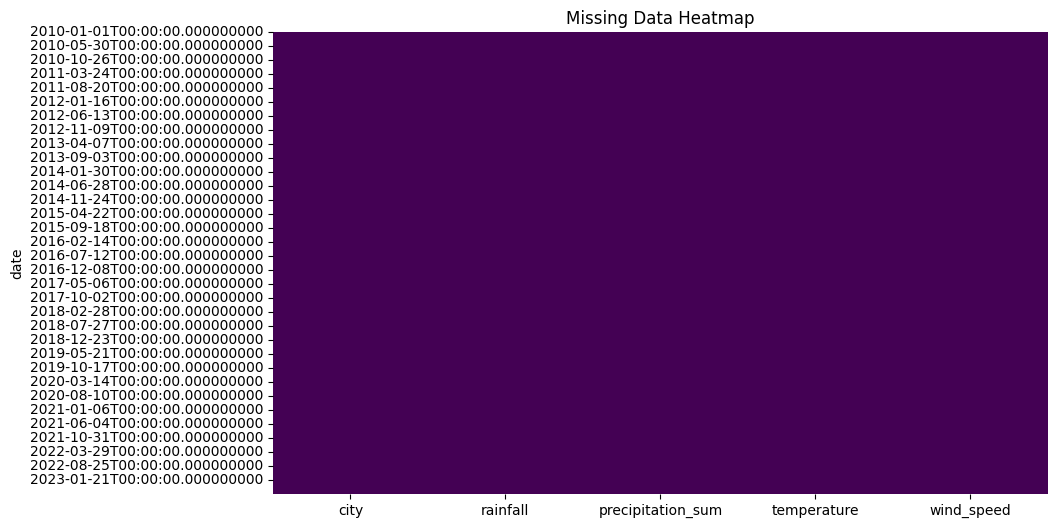

In [30]:
# 6. Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [31]:
# 7. Interpolate missing numeric values based on time
df[numeric_cols] = df[numeric_cols].interpolate(method='time')

In [32]:
# 8. Drop any remaining rows with missing values
df.dropna(inplace=True)

In [33]:
# 9. Final check
print("✅ Final cleaned data:")
print(df.info())


✅ Final cleaned data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               147480 non-null  object 
 1   rainfall           147480 non-null  float64
 2   precipitation_sum  147480 non-null  float64
 3   temperature        147480 non-null  float64
 4   wind_speed         147480 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.8+ MB
None


In [34]:
df.head()

,city,rainfall,precipitation_sum,temperature,wind_speed
date,,,,,
2010-01-01,Colombo,0.0,0.0,26.1,11.7
2010-01-01,Matale,0.0,0.0,23.5,17.7
2010-01-01,Kurunegala,0.0,0.0,24.8,19.2
2010-01-01,Bentota,0.0,0.0,26.3,11.7
2010-01-01,Mount Lavinia,0.0,0.0,26.1,11.7


In [35]:
# 10. Save cleaned dataset
df.to_csv("cleaned_weather_data.csv")
print("✅ Cleaned data saved to 'cleaned_weather_data.csv'")

✅ Cleaned data saved to 'cleaned_weather_data.csv'
